In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Lê a imagem em escala de cinza
img = cv2.imread('marceline.png', 0)
cv2.imshow('Gray Image', img)

hist = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist, color='gray')
plt.xlim([0, 256])
plt.ylim([0, 8000]) # opcional, ajuste de acordo com o histograma gerado
plt.show()


# Define os valores de limite
thresh1 = 44
thresh2 = 90

# Aplica o multithresholding na imagem
ret, thresh_img1 = cv2.threshold(img, thresh1, 255, cv2.THRESH_BINARY)
cv2.imshow('1 thresholding', thresh_img1)
ret, thresh_img2 = cv2.threshold(img, thresh2, 106, cv2.THRESH_BINARY)
cv2.imshow('2 thresholding', thresh_img2)

# Combinando as imagens binarizadas resultantes
multi_thresh_img = cv2.bitwise_or(thresh_img1, thresh_img2)

# Mostra a imagem binarizada
cv2.imshow('Multithresholding', multi_thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Ler a imagem em escala de cinza
img = cv2.imread('marceline.png', 0)

# Calcular o histograma
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Plotar o histograma
plt.plot(hist)

# Mostrar o plot
plt.show()



# Identificar os picos do histograma
peaks, _ = find_peaks(hist, prominence=100, distance=20)

# Plotar o histograma com os picos identificados
plt.plot(hist)
plt.plot(peaks, hist[peaks], "x")

# Mostrar o plot
plt.show()

# Definir os níveis de thresholding a partir dos picos identificados
levels = [0] + peaks.tolist() + [256]

# Aplicar o multithresholding na imagem
thresh_imgs = []
for i in range(len(levels) - 1):
    ret, thresh_img = cv2.threshold(img, levels[i], levels[i+1], cv2.THRESH_BINARY)
    thresh_imgs.append(thresh_img)

# Combinar as imagens binarizadas resultantes
multi_thresh_img = cv2.bitwise_or(*thresh_imgs)

# Mostrar a imagem binarizada
cv2.imshow('Multithresholding', multi_thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()




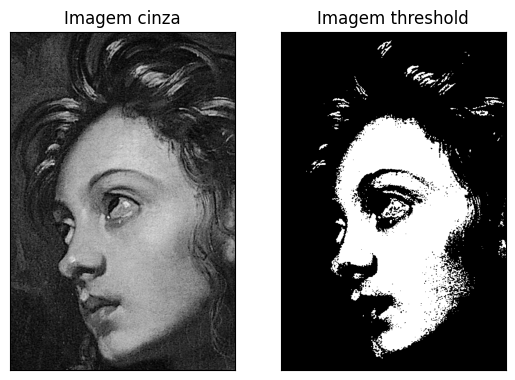

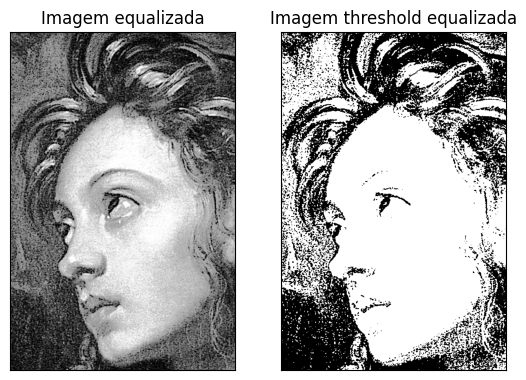

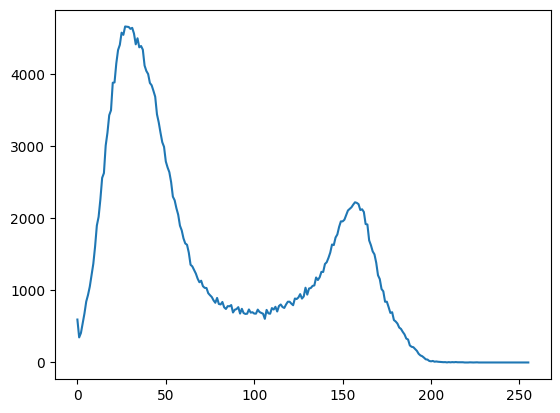

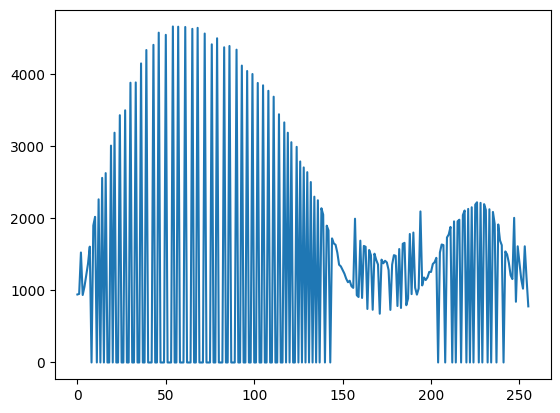

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

# Carrega a imagem em escala de cinza
img = cv2.imread('garota.jpg', cv2.IMREAD_GRAYSCALE)

ret, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Mostra as imagens original e threshold
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem cinza'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh_img, cmap='gray')
plt.title('Imagem threshold'), plt.xticks([]), plt.yticks([])
plt.show()

# Equaliza o histograma da imagem
equalized_img = cv2.equalizeHist(img)

# Divide o histograma em duas partes
half_hist = int(len(hist) / 2)
hist1 = hist[:half_hist]
hist2 = hist[half_hist:]

# Encontra os picos em cada parte do histograma
idx_peak1 = np.argmax(hist1)
idx_peak2 = np.argmax(hist2) + half_hist

# Aplica a média entre os picos encontrados
mean_peak = int((idx_peak1 + idx_peak2) / 2)

ret, thresh_img = cv2.threshold(equalized_img, mean_peak, 255, cv2.THRESH_BINARY)
# Mostra as imagens original e threshold
plt.subplot(121), plt.imshow(equalized_img, cmap='gray')
plt.title('Imagem equalizada'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh_img, cmap='gray')
plt.title('Imagem threshold equalizada'), plt.xticks([]), plt.yticks([])
plt.show()

# Calcula o histograma da imagem
hist, bins = np.histogram(equalized_img.ravel(), 256, [0,256])

# Plotar o histograma
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
plt.plot(hist)
plt.show()

# Plotar o histograma
hist, bins = np.histogram(equalized_img.ravel(), 256, [0, 256])
plt.plot(hist)
plt.show()

#Mostrar a imagem binarizada
cv2.imshow('Multithresholding', thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

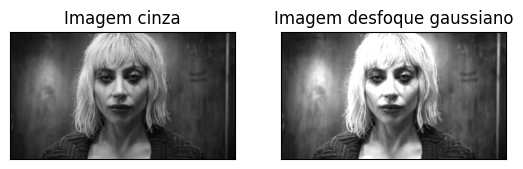

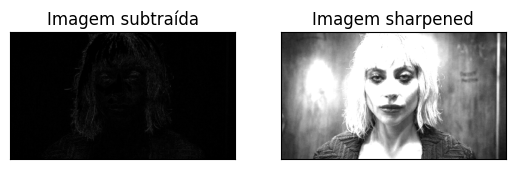

True

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

# Carrega a imagem em escala de cinza
img = cv2.imread('Lady-Gaga.jpg', cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (3, 3), 0)

edges = cv2.subtract(img, blur)

sharpened = cv2.addWeighted(img, 1.5, edges, -0.5, 0)


# Mostra as imagens cinza e desfoque gaussiano
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem cinza'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur, cmap='gray')
plt.title('Imagem desfoque gaussiano'), plt.xticks([]), plt.yticks([])
plt.show()

# Mostra as imagens desfoque gaussiano e sharpened
plt.subplot(121), plt.imshow(edges, cmap='gray')
plt.title('Imagem subtraída'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened, cmap='gray')
plt.title('Imagem sharpened'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('sharpened.jpg', sharpened)



In [31]:
import cv2
import numpy as np

# Ler a imagem
img = cv2.imread('miopia.jpg', 0)

# Definir a função de transferência óptica
h = np.zeros_like(img)
h[int(h.shape[0]/2), int(h.shape[1]/2)] = 1

# Aplicar a Transformada de Fourier na imagem e na função de transferência
img_fft = np.fft.fft2(img)
h_fft = np.fft.fft2(h)

# Calcular a convolução óptica
convolution = np.multiply(img_fft, h_fft)

# Aplicar a Transformada Inversa de Fourier para obter a imagem filtrada
filtered_img = np.fft.ifft2(convolution)

# Converter a imagem filtrada de complexa para real
filtered_img = np.real(filtered_img)

# Normalizar a imagem filtrada para valores entre 0 e 255
filtered_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX)

# Mostrar as imagens original e filtrada
cv2.imshow('Imagem Original', img)
cv2.imshow('Imagem Filtrada', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
